In [1]:
%config InlineBackend.figure_formats = ['svg']

In [2]:
import pandas as pd
import duckdb
import networkx as nx
from pyvis import network as net
import copy
import utils
pd.set_option('display.max_columns', None)

In [3]:
# df_csv = pd.read_csv('https://fr.ftp.opendatasoft.com/infrabel/PunctualityHistory/Data_raw_punctuality_202302.csv')
df_csv = pd.read_csv('Data_raw_punctuality_202302.csv', encoding='utf8')

In [4]:
sql = """
    SELECT
        strptime(DATDEP, '%d%b%Y') AS DATEDEP,
        TRAIN_NO,
        RELATION,
        TRAIN_SERV,
        PTCAR_NO,
        LINE_NO_DEP,
        CAST(strptime(REAL_DATE_ARR,    '%d%b%Y') AS DATE) + CAST(strptime(REAL_TIME_ARR,    '%-H:%M:%S') AS TIME) AS REAL_DT_ARR,
        CAST(strptime(REAL_DATE_DEP,    '%d%b%Y') AS DATE) + CAST(strptime(REAL_TIME_DEP,    '%-H:%M:%S') AS TIME) AS REAL_DT_DEP,
        CAST(strptime(PLANNED_DATE_ARR, '%d%b%Y') AS DATE) + CAST(strptime(PLANNED_TIME_ARR, '%-H:%M:%S') AS TIME) AS PLANNED_DT_ARR,
        CAST(strptime(PLANNED_DATE_DEP, '%d%b%Y') AS DATE) + CAST(strptime(PLANNED_TIME_DEP, '%-H:%M:%S') AS TIME) AS PLANNED_DT_DEP,
        DELAY_ARR,
        DELAY_DEP,
        RELATION_DIRECTION,
        PTCAR_LG_NM_NL,
        LINE_NO_ARR,
        EXTRACT('DOW' FROM REAL_DT_ARR) AS REAL_DAY_ARR,
        DAYNAME(REAL_DT_ARR) AS REAL_DAYNAME_ARR,
        REAL_DAY_ARR || '. ' || REAL_DAYNAME_ARR AS DOW_ARR,
    FROM
        df_csv
"""

In [5]:
df = duckdb.sql(sql).df()
df

FloatProgress(value=0.0, layout=Layout(width='100%'), style=ProgressStyle(bar_color='black'))

,DATEDEP,TRAIN_NO,RELATION,TRAIN_SERV,PTCAR_NO,LINE_NO_DEP,REAL_DT_ARR,REAL_DT_DEP,PLANNED_DT_ARR,PLANNED_DT_DEP,DELAY_ARR,DELAY_DEP,RELATION_DIRECTION,PTCAR_LG_NM_NL,LINE_NO_ARR,REAL_DAY_ARR,REAL_DAYNAME_ARR,DOW_ARR
0,2023-02-01,11,ICE,SNCB/NMBS,220,0/1,NaT,2023-02-01 06:23:35,NaT,2023-02-01 06:23:00,NaN,35.0,ICE: BRUSSEL-ZUID -> FRANKFURT(MAIN) HBF,BRUSSEL-ZUID,NaN,NaN,NaN,NaN
1,2023-02-01,11,ICE,SNCB/NMBS,217,0/1,2023-02-01 06:25:50,2023-02-01 06:25:50,2023-02-01 06:25:00,2023-02-01 06:25:00,50.0,50.0,ICE: BRUSSEL-ZUID -> FRANKFURT(MAIN) HBF,BRUSSEL-KAPELLEKERK,0/1,3.0,Wednesday,3. Wednesday
2,2023-02-01,11,ICE,SNCB/NMBS,215,0/1,2023-02-01 06:26:43,2023-02-01 06:26:43,2023-02-01 06:26:00,2023-02-01 06:26:00,43.0,43.0,ICE: BRUSSEL-ZUID -> FRANKFURT(MAIN) HBF,BRUSSEL-CENTRAAL,0/1,3.0,Wednesday,3. Wednesday
3,2023-02-01,11,ICE,SNCB/NMBS,216,0/1,2023-02-01 06:27:47,2023-02-01 06:27:47,2023-02-01 06:27:00,2023-02-01 06:27:00,47.0,47.0,ICE: BRUSSEL-ZUID -> FRANKFURT(MAIN) HBF,BRUSSEL-CONGRES,0/1,3.0,Wednesday,3. Wednesday
4,2023-02-01,11,ICE,SNCB/NMBS,221,36N,2023-02-01 06:29:50,2023-02-01 06:31:47,2023-02-01 06:29:00,2023-02-01 06:31:00,50.0,47.0,ICE: BRUSSEL-ZUID -> FRANKFURT(MAIN) HBF,BRUSSEL-NOORD,0/1,3.0,Wednesday,3. Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1774542,2023-02-28,17209,EXTRA,SNCB/NMBS,1232,15,2023-02-28 18:29:48,2023-02-28 18:29:48,2023-02-28 18:35:00,2023-02-28 18:35:00,-311.0,-311.0,NaN,WOLFSTEE,15,2.0,Tuesday,2. Tuesday
1774543,2023-02-28,17209,EXTRA,SNCB/NMBS,199,15,2023-02-28 18:31:24,2023-02-28 18:31:24,2023-02-28 18:36:00,2023-02-28 18:36:00,-276.0,-276.0,NaN,BOUWEL,15,2.0,Tuesday,2. Tuesday
1774544,2023-02-28,17209,EXTRA,SNCB/NMBS,907,15,2023-02-28 18:34:20,2023-02-28 18:34:20,2023-02-28 18:39:00,2023-02-28 18:39:00,-280.0,-280.0,NaN,NIJLEN,15,2.0,Tuesday,2. Tuesday
1774545,2023-02-28,17209,EXTRA,SNCB/NMBS,635,15,2023-02-28 18:36:11,2023-02-28 18:36:11,2023-02-28 18:42:00,2023-02-28 18:42:00,-349.0,-349.0,NaN,KESSEL,15,2.0,Tuesday,2. Tuesday


<Axes: xlabel='RELATION'>

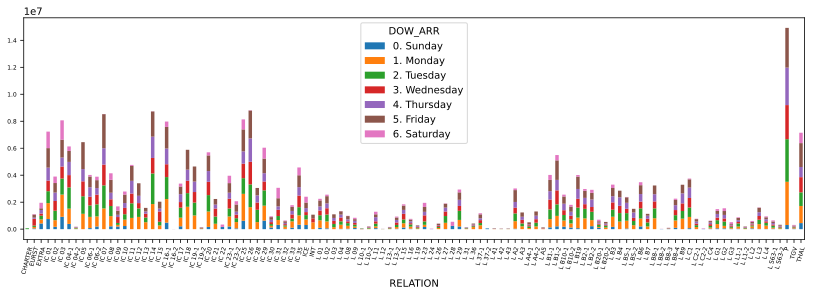

In [6]:
df.groupby(['RELATION', 'DOW_ARR'])['DELAY_ARR'].sum().unstack().plot(kind='bar', stacked=True, figsize=(14,4), rot=75, fontsize=6)

<Axes: xlabel='LINE_NO_ARR'>

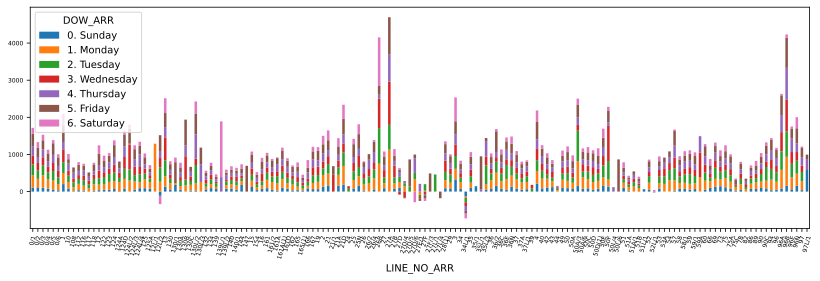

In [7]:
df.groupby(['LINE_NO_ARR', 'DOW_ARR'])['DELAY_ARR'].mean().unstack().plot(kind='bar', stacked=True, figsize=(14,4), rot=75, fontsize=6)

In [8]:
sql_shift = """
    SELECT
        *,
        LEAD(PTCAR_LG_NM_NL) OVER w AS NEXT_PTCAR_LG_NM_NL,
        LEAD(LINE_NO_ARR) OVER w AS NEXT_LINE_NO_ARR,
        LEAD(PTCAR_NO) OVER w AS NEXT_PTCAR_NO,
        LEAD(LINE_NO_DEP) OVER w AS NEXT_LINE_NO_DEP,
        LEAD(REAL_DT_ARR) OVER w AS NEXT_REAL_DT_ARR,
        LEAD(REAL_DT_DEP) OVER w AS NEXT_REAL_DT_DEP,
        LEAD(PLANNED_DT_ARR) OVER w AS NEXT_PLANNED_DT_ARR,
        LEAD(PLANNED_DT_DEP) OVER w AS NEXT_PLANNED_DT_DEP,
    FROM
        df
    WINDOW w AS (PARTITION BY DATEDEP, TRAIN_NO ORDER BY COALESCE(REAL_DT_ARR, REAL_DT_DEP), REAL_DT_DEP)
"""

In [9]:
df_shifted = duckdb.sql(sql_shift).df()
df_shifted

FloatProgress(value=0.0, layout=Layout(width='100%'), style=ProgressStyle(bar_color='black'))

,DATEDEP,TRAIN_NO,RELATION,TRAIN_SERV,PTCAR_NO,LINE_NO_DEP,REAL_DT_ARR,REAL_DT_DEP,PLANNED_DT_ARR,PLANNED_DT_DEP,DELAY_ARR,DELAY_DEP,RELATION_DIRECTION,PTCAR_LG_NM_NL,LINE_NO_ARR,REAL_DAY_ARR,REAL_DAYNAME_ARR,DOW_ARR,NEXT_PTCAR_LG_NM_NL,NEXT_LINE_NO_ARR,NEXT_PTCAR_NO,NEXT_LINE_NO_DEP,NEXT_REAL_DT_ARR,NEXT_REAL_DT_DEP,NEXT_PLANNED_DT_ARR,NEXT_PLANNED_DT_DEP
0,2023-02-01,414,IC 12,SNCB/NMBS,649,75,NaT,2023-02-01 14:18:59,NaT,2023-02-01 14:18:00,NaN,59.0,IC 12: KORTRIJK -> WELKENRAEDT,KORTRIJK,NaN,NaN,NaN,NaN,HARELBEKE,75,520.0,75,2023-02-01 14:24:32,2023-02-01 14:26:15,2023-02-01 14:23:00,2023-02-01 14:24:00
1,2023-02-01,414,IC 12,SNCB/NMBS,520,75,2023-02-01 14:24:32,2023-02-01 14:26:15,2023-02-01 14:23:00,2023-02-01 14:24:00,92.0,135.0,IC 12: KORTRIJK -> WELKENRAEDT,HARELBEKE,75,3.0,Wednesday,3. Wednesday,WAREGEM,75,1212.0,75,2023-02-01 14:31:47,2023-02-01 14:32:51,2023-02-01 14:30:00,2023-02-01 14:31:00
2,2023-02-01,414,IC 12,SNCB/NMBS,1212,75,2023-02-01 14:31:47,2023-02-01 14:32:51,2023-02-01 14:30:00,2023-02-01 14:31:00,107.0,111.0,IC 12: KORTRIJK -> WELKENRAEDT,WAREGEM,75,3.0,Wednesday,3. Wednesday,DEINZE,75,317.0,75,2023-02-01 14:39:21,2023-02-01 14:41:19,2023-02-01 14:38:00,2023-02-01 14:39:00
3,2023-02-01,414,IC 12,SNCB/NMBS,317,75,2023-02-01 14:39:21,2023-02-01 14:41:19,2023-02-01 14:38:00,2023-02-01 14:39:00,81.0,139.0,IC 12: KORTRIJK -> WELKENRAEDT,DEINZE,75,3.0,Wednesday,3. Wednesday,DEINZE-WIJKSPOREN,75,93.0,75,2023-02-01 14:42:25,2023-02-01 14:42:25,2023-02-01 14:40:00,2023-02-01 14:40:00
4,2023-02-01,414,IC 12,SNCB/NMBS,93,75,2023-02-01 14:42:25,2023-02-01 14:42:25,2023-02-01 14:40:00,2023-02-01 14:40:00,145.0,145.0,IC 12: KORTRIJK -> WELKENRAEDT,DEINZE-WIJKSPOREN,75,3.0,Wednesday,3. Wednesday,DE PINTE,75,320.0,75,2023-02-01 14:46:08,2023-02-01 14:46:56,2023-02-01 14:44:00,2023-02-01 14:45:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1774542,2023-02-28,19827,L S63-2,SNCB/NMBS,259,NaN,2023-02-28 06:40:22,NaT,2023-02-28 06:38:00,NaT,142.0,NaN,L S63-2: ERQUELINNES -> CHARLEROI-CENTRAL,CHARLEROI-CENTRAL,130A,2.0,Tuesday,2. Tuesday,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaT
1774543,2023-02-28,19941,IC 19-2,SNCB/NMBS,427,94,2023-02-28 15:32:01,2023-02-28 15:33:13,2023-02-28 15:31:00,2023-02-28 15:32:00,61.0,73.0,IC 19-2: LILLE FLANDRES -> TOURNAI,FROYENNES,94,2.0,Tuesday,2. Tuesday,TOURNAI,94,1154.0,NaN,2023-02-28 15:36:20,NaT,2023-02-28 15:36:00,NaT
1774544,2023-02-28,19941,IC 19-2,SNCB/NMBS,1154,NaN,2023-02-28 15:36:20,NaT,2023-02-28 15:36:00,NaT,20.0,NaN,IC 19-2: LILLE FLANDRES -> TOURNAI,TOURNAI,94,2.0,Tuesday,2. Tuesday,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaT
1774545,2023-02-28,19967,IC 19-2,SNCB/NMBS,427,94,2023-02-28 20:30:59,2023-02-28 20:32:52,2023-02-28 20:31:00,2023-02-28 20:32:00,0.0,52.0,IC 19-2: LILLE FLANDRES -> TOURNAI,FROYENNES,94,2.0,Tuesday,2. Tuesday,TOURNAI,94,1154.0,NaN,2023-02-28 20:36:30,NaT,2023-02-28 20:36:00,NaT


In [10]:
df_ptcars = utils.get_ptcars_l72()
df_ptcars

,ptcarid,taftapcode,symbolicname,shortnamefrench,shortnamedutch,longnamefrench,longnamedutch,commercialshortnamefrench,commercialshortnamedutch,commercialmiddlenamefrench,commercialmiddlenamedutch,commerciallongnamefrench,commerciallongnamedutch,classification,class_en,class_fr,lat,lng,x72,y72
0,937,BE00937,LTR,OTTIGNIES-R,OTTIGNIES-R,OTTIGNIES-RELAIS,OTTIGNIES-RELAIS,Ottignies-R,Ottignies-R,Ottignies-Relais,Ottignies-Relais,Ottignies-Relais,Ottignies-Relais,Station,Station,Gare,50.679135,4.565488,163904.839691,152078.450442
1,1375,BE01375,RPETF,R.PTE-FOLIE,R.PTE-FOLIE,RACC.PETITE-FOLIE,RACC.PETITE-FOLIE,R.Pte-Folie,R.Pte-Folie,Racc.Petite-Folie,Racc.Petite-Folie,Racc.Petite-Folie,Racc.Petite-Folie,Verbinding,Connection,Raccordement,50.605216,5.549683,233591.959340,144502.994959
2,1978,BE01978,FCLGS,CHATELET-GAS,CHATELET-GAS,CHATELET-GASOIL,CHATELET-GASOIL,Châtelet-Gas,Châtelet-Gas,Châtelet-Gasoil,Châtelet-Gasoil,Châtelet-Gasoil,Châtelet-Gasoil,Dienstinstallatie,Service installation,Installation de service,50.411331,4.522442,160924.389688,122282.670451
3,511,BE00511,FNDMH,ANTW-ND-P.MH,ANTW-ND-P.MH,ANTWERPEN-NOORD-PERRON MAINHUB,ANTWERPEN-NOORD-PERRON MAINHUB,Antw-Nd-P.MH,Antw-Nd-P.MH,Antw-Nd-Per. MainHub,Antw-Nd-Per. MainHub,Antwerpen-Noord-Perron MainHub,Antwerpen-Noord-Perron MainHub,Diensthalte,Service stop,Point d'arrêt de service,51.298807,4.370846,150145.569335,220995.966714
4,1010,BE01010,FEOPE,RONET-PE,RONET-PE,RONET-P.E.,RONET-P.E.,Ronet-PE,Ronet-PE,Ronet-P.E.,Ronet-P.E.,Ronet-P.E.,Ronet-P.E.,Dienstinstallatie,Service installation,Installation de service,50.453502,4.822607,182230.652474,127060.800253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1291,1764,BE01764,FSUD,BAULERS-D,BAULERS-D,BAULERS-GRIL D,BAULERS-GRIL D,Baulers-D,Baulers-D,Baulers-Gril D,Baulers-Gril D,Baulers-Gril D,Baulers-Gril D,Rooster,Grid,Gril,50.614318,4.349774,148657.105438,144850.084758
1292,1766,BE01766,YVSLB,Y.VAL-ST-LAM,Y.VAL-ST-LAM,Y.VAL-SAINT-LAMBERT,Y.VAL-SAINT-LAMBERT,Y.Val-St-Lam,Y.Val-St-Lam,Y.Val-Saint-Lambert,Y.Val-Saint-Lambert,Y.Val-Saint-Lambert,Y.Val-Saint-Lambert,Vertakking,Junction,Bifurcation,50.597765,5.485150,229036.897815,143603.585200
1293,1769,BE01769,YLAKN,Y.LAEKEN,Y.LAKEN,Y.LAEKEN,Y.LAKEN,Y.Laeken,Y.Laken,Y.Laeken,Y.Laken,Y.Laeken,Y.Laken,Vertakking,Junction,Bifurcation,50.878007,4.353152,148902.024698,174182.250433
1294,1770,BE01770,FSR26,SCH'B-AF-26A,SCH'B-TV-26A,SCHAERBEEK-ACC.FORMATION-L26A,SCHAARBEEK-TOEG.VORMING-L26A,Sch'b-AF-26A,Sch'b-TV-26A,Schaerb-Accès F-L26A,Schaarb-Toeg.V-L26A,Schaerbeek-Acc.Formation-L26A,Schaarbeek-Toeg.Vorming-L26A,Rooster,Grid,Gril,50.893715,4.402878,152400.882617,175930.153696


In [11]:
sql_nodes = """
    SELECT
        a.*,
        p.x72 AS X72,
        p.y72 AS Y72,
    FROM
    (
        SELECT
            PTCAR_LG_NM_NL || '_' || LINE_NO_ARR AS NODE,
            PTCAR_LG_NM_NL,
            PTCAR_NO,
            LINE_NO_ARR AS LINE,
        FROM
            df
        UNION
        SELECT
            PTCAR_LG_NM_NL || '_' || LINE_NO_DEP AS NODE,
            PTCAR_LG_NM_NL,
            PTCAR_NO,
            LINE_NO_DEP AS LINE
        FROM
            df
    ) AS a
    LEFT JOIN
        df_ptcars p ON p.ptcarid = a.PTCAR_NO
    WHERE
        a.NODE IS NOT NULL
"""

In [12]:
df_nodes = duckdb.sql(sql_nodes).df()
df_nodes

,NODE,PTCAR_LG_NM_NL,PTCAR_NO,LINE,X72,Y72
0,MORTSEL-OUDE GOD_25,MORTSEL-OUDE GOD,866,25,156058.904700,206870.245424
1,BRUSSEL-NOORD_36N,BRUSSEL-NOORD,221,36N,149471.943604,172134.546475
2,HOEILAART_161,HOEILAART,572,161,156962.253702,161080.176029
3,ETTERBEEK_161,ETTERBEEK,380,161,151532.367610,167875.135767
4,PEPINSTER_37,PEPINSTER,956,37,252114.610967,140747.333319
...,...,...,...,...,...,...
866,PALISEUL_166,PALISEUL,951,166,203921.347795,65109.218570
867,BERTRIX_166,BERTRIX,146,166,214680.027114,60486.680592
868,FLEURUS_140,FLEURUS,404,140,162496.789688,130273.700449
869,FLEURUS_147,FLEURUS,404,147,162496.789688,130273.700449


In [13]:
all_nodes = list(zip(df_nodes['NODE'], df_nodes[['PTCAR_LG_NM_NL', 'PTCAR_NO', 'LINE']].to_dict(orient='records')))

In [14]:
sql_edges = """
    SELECT 
        a.*
    FROM
    (
        SELECT
            'ptcar' AS EDGE_TYPE,
            PTCAR_LG_NM_NL || '_' || LINE_NO_ARR AS NODE_FROM,
            LINE_NO_ARR AS NODE_FROM_LINE,
            PTCAR_LG_NM_NL || '_' || LINE_NO_DEP AS NODE_TO,
            LINE_NO_DEP AS NODE_TO_LINE,
            'N/A' AS LINE,
            GREATEST(MEDIAN(EXTRACT('epoch' FROM (REAL_DT_DEP - REAL_DT_ARR))), 0.5) AS MEDIAN_DURATION,
        FROM
            df_shifted
        GROUP BY
            1, 2, 3, 4, 5, 6
        UNION
        SELECT
            'linesection' AS EDGE_TYPE,
            PTCAR_LG_NM_NL || '_' || LINE_NO_DEP AS NODE_FROM,
            LINE_NO_DEP AS NODE_FROM_LINE,
            NEXT_PTCAR_LG_NM_NL || '_' || NEXT_LINE_NO_ARR AS NODE_TO,
            NEXT_LINE_NO_ARR AS NODE_TO_LINE,
            LINE_NO_DEP AS LINE,
            GREATEST(MEDIAN(EXTRACT('epoch' FROM (NEXT_REAL_DT_ARR - REAL_DT_DEP))), 0.5) AS MEDIAN_DURATION,
        FROM
            df_shifted
        GROUP BY
            1, 2, 3, 4, 5, 6
    ) AS a
    WHERE
        a.NODE_FROM != a.NODE_TO
        AND NODE_FROM IS NOT NULL
        AND NODE_TO IS NOT NULL
"""

In [15]:
df_edges = duckdb.sql(sql_edges).df()
df_edges

,EDGE_TYPE,NODE_FROM,NODE_FROM_LINE,NODE_TO,NODE_TO_LINE,LINE,MEDIAN_DURATION
0,ptcar,NAMUR_125,125,NAMUR_161,161,N/A,220.0
1,ptcar,OTTIGNIES_161A(1),161A(1),OTTIGNIES_161,161,N/A,129.0
2,ptcar,BRUSSEL-NOORD_161/2,161/2,BRUSSEL-NOORD_0/4,0/4,N/A,134.0
3,ptcar,WATERMAAL_161A,161A,WATERMAAL_161,161,N/A,0.5
4,ptcar,OTTIGNIES_161,161,OTTIGNIES_161A(1),161A(1),N/A,202.0
...,...,...,...,...,...,...,...
2983,linesection,FRANIERE_130,130,FLAWINNE_130,130,130,366.0
2984,linesection,FLEMALLE-GRANDE_125,125,FLEMALLE-HAUTE_125,125,125,239.5
2985,linesection,OTTIGNIES_161,161,PROFONDSART_161,161,161,225.0
2986,linesection,MOL_15,15,GEEL_15,15,15,402.0


In [16]:
all_edges = list(zip(df_edges['NODE_FROM'], df_edges['NODE_TO'], df_edges[['EDGE_TYPE', 'LINE', 'MEDIAN_DURATION']].to_dict(orient='records')))

In [17]:
G = nx.DiGraph()
G.add_nodes_from(all_nodes)
G.add_edges_from(all_edges)

In [18]:
G.number_of_edges()

2988

In [27]:
def show_pyvis(G, html='pyvis.html'):
    g = net.Network(
        notebook=True,
        cdn_resources='remote',
        directed=True,
    )
    g.inherit_edge_colors(False)
    g.from_nx(G)
    return g.show(html)

In [20]:
def select_lines(G, lines):
    selected_nodes = [node[0] for node in G.nodes(data=True) if node[1]['LINE'] in lines]
    return G.subgraph(selected_nodes)

In [21]:
# show_pyvis(G, html='network.html')

In [22]:
H = select_lines(G, ['124', '124A', '117', '96'])

In [28]:
show_pyvis(H, html='subnetwork.html')

subnetwork.html


In [29]:
nx.shortest_path(G, 'CHARLEROI-CENTRAL_124', 'BRUSSEL-ZUID_96', weight='MEDIAN_DURATION')

['CHARLEROI-CENTRAL_124',
 'MARCHIENNE-AU-PONT_124',
 'ROUX_124',
 'COURCELLES-MOTTE_124',
 'OBAIX-BUZET_124',
 'NIVELLES_124',
 'BRAINE-ALLIANCE_124',
 "BRAINE-L'ALLEUD_124",
 'WATERLOO_124',
 'SINT-GENESIUS-RODE_124',
 'HOLLEKEN_124',
 'LINKEBEEK_124',
 'SINT-JOB_26',
 'DIESDELLE_26',
 'BEERSEL_26',
 'HALLE_94',
 'LOT_96E',
 'LOT_96',
 'BRUSSEL-KAPELLEKERK_0/5',
 'BRUSSEL-KAPELLEKERK_0/3',
 'BRUSSEL-ZUID_96']

In [30]:
def show_shortest_path(G, node_from, node_to, weight='MEDIAN_DURATION'):
    H = copy.deepcopy(G)
    nodes = nx.shortest_path(G, node_from, node_to, weight=weight)
    edges = list(zip(nodes, nodes[1:]))
    subgraph = H.edge_subgraph(edges)
    for node in subgraph.nodes(data=True):
        node[1]['color'] = 'orange'
    for edge in subgraph.edges(data=True):
        edge[2]['color'] = 'orange'
    return show_pyvis(H, html='shortestpath.html')

In [31]:
show_shortest_path(G, 'CHARLEROI-CENTRAL_124', 'BRUSSEL-ZUID_96')

shortestpath.html
